## Mini Project # 4 - Finding Waldo

In [41]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

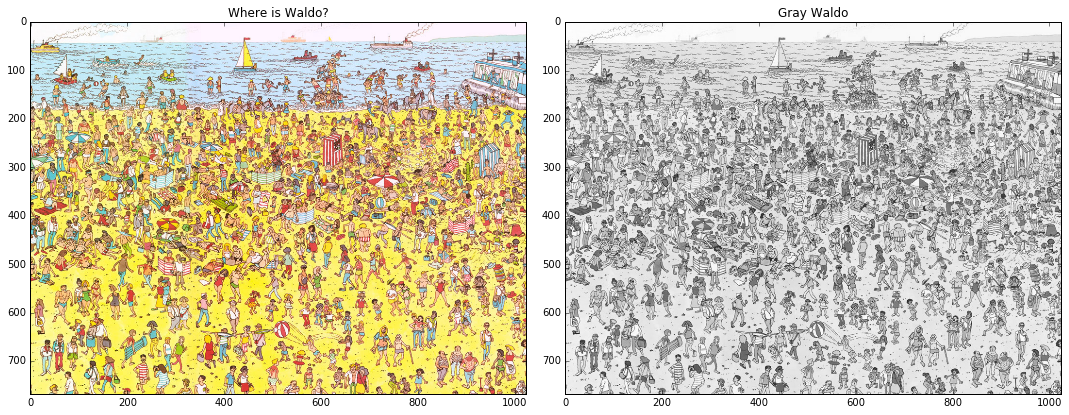

In [42]:
# Load input image and convert to grayscale
image_template = cv2.imread('../../images/WaldoBeach.jpg')
gray_template = cv2.cvtColor(image_template, cv2.COLOR_BGR2GRAY)

row, col = 1, 2
fig, axs = plt.subplots(row, col, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(cv2.cvtColor(image_template, cv2.COLOR_BGR2RGB))
axs[0].set_title('Where is Waldo?')
cv2.imwrite('wheres_waldo.jpg', image_template)

axs[1].imshow(cv2.cvtColor(gray_template, cv2.COLOR_BGR2RGB))
axs[1].set_title('Gray Waldo')
cv2.imwrite('gray_waldo.jpg', gray_template)

plt.show()

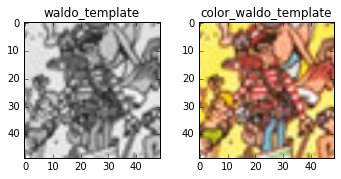

In [43]:
# Load Template image
gray_waldo = cv2.imread('../../images/waldo.jpg',0)
color_waldo = cv2.imread('../../images/waldo.jpg')

row, col = 1, 2
fig, axs = plt.subplots(row, col, figsize=(5, 3))
fig.tight_layout()
 
axs[0].imshow(cv2.cvtColor(gray_waldo, cv2.COLOR_BGR2RGB))
axs[0].set_title('waldo_template')
cv2.imwrite('waldo_template.jpg', gray_waldo)

axs[1].imshow(cv2.cvtColor(color_waldo, cv2.COLOR_BGR2RGB))
axs[1].set_title('color_waldo_template')
cv2.imwrite('color_waldo_template.jpg', color_waldo)

plt.show()

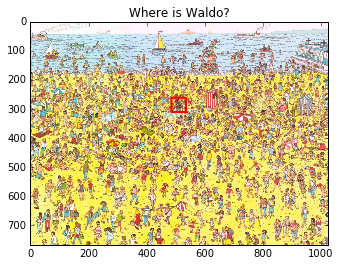

True

In [45]:
result = cv2.matchTemplate(gray_template, gray_waldo, cv2.TM_CCOEFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

#Create Bounding Box
top_left = max_loc
bottom_right = (top_left[0] + 50, top_left[1] + 50)
cv2.rectangle(image_template, top_left, bottom_right, (0,0,255), 5)

plt.imshow(cv2.cvtColor(image_template, cv2.COLOR_BGR2RGB))
plt.title('Where is Waldo?'); plt.show()
cv2.imwrite('output_template.jpg', image_template)

### Notes on Template Matching

There are a variety of methods to perform template matching, but in this case we are using the correlation coefficient which is specified by the flag **cv2.TM_CCOEFF.**

So what exactly is the cv2.matchTemplate function doing?
Essentially, this function takes a “sliding window” of our waldo query image and slides it across our puzzle image from left to right and top to bottom, one pixel at a time. Then, for each of these locations, we compute the correlation coefficient to determine how “good” or “bad” the match is. 

Regions with sufficiently high correlation can be considered “matches” for our waldo template.
From there, all we need is a call to cv2.minMaxLoc on Line 22 to find where our “good” matches are.
That’s really all there is to template matching!

http://docs.opencv.org/2.4/modules/imgproc/doc/object_detection.html      